<a href="https://colab.research.google.com/github/20192931/AImobility/blob/main/3_2_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%86%8D%EC%84%B1%EB%B0%8F%EC%8B%9C%EA%B0%81%ED%99%94_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **I-01. 청소년 스트레스 정도 파악**


### **Step 0.사전 실행 작업 안내**
1) Colab 환경에서는 한글폰트를 지원하지 않고 있어 Step 0의 1) 명령을 실행하여 한글 폰트를 설치한다.
> 설치한 폰트가  적용되려면 반드시 Step 0의 1) 실행 이후 메뉴에서 '런타임 > 런타임 다시 시작'을 해주어 한다.
> 런타임 다시 시작 이후에는 1)폰트 설치 작업 단계는 더이상 실행하지 않고 
Step 0의 2)파일 다운로드를 진행한다. 

2) 프로젝트에 사용할 공유 파일 다운로드한다.

1) 폰트 설치 작업

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

2) 구글 Colab에서 공유된 파일 다운로드해서 가져오기 - 'I-01_청소년스트레스인지율.xlsx'

In [ ]:
!gdown 1f_JAkuCaVhIPsfygZK2eXKrulzQnxohB

Downloading...
From: https://drive.google.com/uc?id=1f_JAkuCaVhIPsfygZK2eXKrulzQnxohB
To: /content/I-01_청소년스트레스인지율.xlsx
100% 18.8k/18.8k [00:00<00:00, 25.3MB/s]


### **Step 1 : 라이브러리 가져오기**

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt  

from matplotlib import font_manager, rc
rc ('font', family='NanumBarunGothic')
rc ('axes', unicode_minus= False)

### **Step 2 : 데이터 읽기 및 정보 파악**


1) 파일 읽어오기

In [ ]:
df = pd.read_excel('I-01_청소년스트레스인지율.xlsx' )
df.head(50)

,연도,지역,남,여
0,2005,서울,40.5,53.6
1,2005,부산,39.8,48.5
2,2005,대구,37.2,50.6
3,2005,인천,39.7,51.9
4,2005,광주,41,50.9
5,2005,대전,43.1,52.6
6,2005,울산,40.7,49.3
7,2005,세종,-,-
8,2005,경기,39.8,53.4
9,2005,강원,42.4,54.4


2) 데이터 정보 파악하기

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연도      289 non-null    int64 
 1   지역      289 non-null    object
 2   남       289 non-null    object
 3   여       289 non-null    object
dtypes: int64(1), object(3)
memory usage: 9.2+ KB


### **Step 3 : 데이터 처리**

1) 데이터 타입 변경하기


In [ ]:
df['남']=df['남'].replace('-', np.nan)
df['남']=df['남'].astype('float')

<font color=blue> **실습1. colume [여]의 '-'값을 np.nan으로 변경 후 datatype을 'float'로 변경한다.**

In [ ]:
df['여']=df['여'].replace('-', np.nan)
df['여']=df['여'].astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      289 non-null    int64  
 1   지역      289 non-null    object 
 2   남       279 non-null    float64
 3   여       279 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 9.2+ KB


2) 데이터 컬럼명 변경하기

In [ ]:
df.rename(columns={'남':'남학생'}, inplace=True)

<font color=blue> **실습2. [여]항목 컬럼명을 [여학생]으로 변경한다.**

In [ ]:
df.rename(columns={'여':'여학생'}, inplace=True)

In [ ]:
df.head()

,연도,지역,남학생,여학생
0,2005,서울,40.5,53.6
1,2005,부산,39.8,48.5
2,2005,대구,37.2,50.6
3,2005,인천,39.7,51.9
4,2005,광주,41.0,50.9


3)특정 항목 기준으로 데이터 묶어 처리하기
- 데이터 별로 통계 또는 집계 결과를 얻기 위해 groupby() 이용하여 지역별 평균 데이터 df_region 생성한다.

In [ ]:
df_region = df.groupby('지역').mean()   
df_region = df_region.round(2)
df_region

,연도,남학생,여학생
지역,,,
강원,2013.0,35.11,49.05
경기,2013.0,35.22,49.14
경남,2013.0,33.01,45.00
경북,2013.0,32.74,46.72
광주,2013.0,35.69,48.25
대구,2013.0,31.82,44.11
대전,2013.0,36.02,49.78
부산,2013.0,31.82,44.29
서울,2013.0,35.69,48.96


4) 불필요한 항목 삭제하기 

In [ ]:
df_data = df_region.drop(columns= ['연도'])
df_data.head()

,남학생,여학생
지역,,
강원,35.11,49.05
경기,35.22,49.14
경남,33.01,45.00
경북,32.74,46.72
광주,35.69,48.25


5) 특정 문자열을 포한하는 행 추출하고, 인덱스 변환하기

**str.contains() 사용 방법**


1.   str.contains는 지정한 문자열이 완전히 일치하는 값이 아닌 부분 일치 하는 값을 찾음
2.   문자열을 검색할 컬럼에 NaN 값이 존재하는 경우에는 True 또는 False가 아닌 NaN을 반환
3. NaN이 존재하는 경우 데이터 취득시 에러나므로 na로 NaN 결과를 치환해 주도록 설정
> 예시. (df['name'].str.contains('li', na=True))
4. str.contains() 기본 설정은 대문자와 소문자를 구분

In [ ]:
df_seoul = df[df['지역'].str.contains('서울')]
df_seoul

,연도,지역,남학생,여학생
0,2005,서울,40.5,53.6
17,2006,서울,41.7,54.5
34,2007,서울,43.2,53.7
51,2008,서울,40.1,49.4
68,2009,서울,37.7,49.8
85,2010,서울,38.7,51.9
102,2011,서울,37.2,50.3
119,2012,서울,34.9,49.0
136,2013,서울,34.6,50.3
153,2014,서울,32.2,45.8


In [ ]:
df_seoul.set_index('연도', drop=True, inplace=True)
df_seoul

,지역,남학생,여학생
연도,,,
2005,서울,40.5,53.6
2006,서울,41.7,54.5
2007,서울,43.2,53.7
2008,서울,40.1,49.4
2009,서울,37.7,49.8
2010,서울,38.7,51.9
2011,서울,37.2,50.3
2012,서울,34.9,49.0
2013,서울,34.6,50.3


<font color=blue> **실습3. 특정 지역을 선택한 후 그 지역이 포함된 행을 추출한 후 새 데이터프레임에 담는다.**

### **Step 4 : 데이터 시각화**

1) 전체 데이터 살펴보고 시각화하기
- 막대 그래프로 데이터를 표현한다. 

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_text

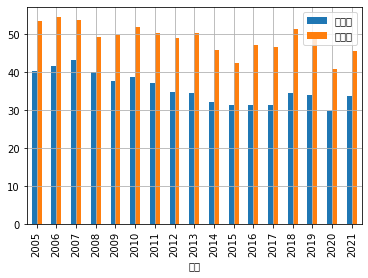

In [ ]:
df_seoul.plot.bar()
plt.grid(True)

- 박스그래프로 데이터를 표현한다.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_te

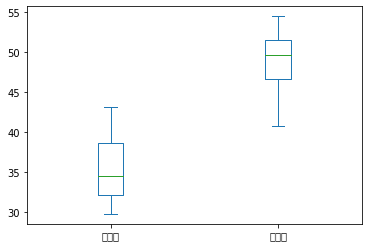

In [ ]:
df_seoul.plot.box()

2) 특정 지역의 연도별 추이 살펴보기

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_text

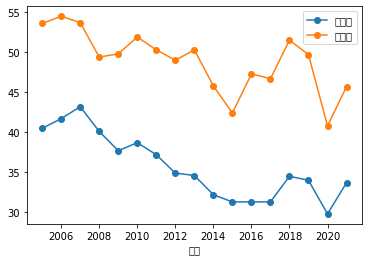

In [ ]:
df_seoul.plot(marker='o')

<font color=blue> **실습4. 자신이 선택한 특정 지역의 연도별 변화 추이 그래프를 그려본다**

**그래프 해석해보기** 

In [ ]:
#그래프를 통해서 알 수 있는 것을 적어본다

### **Step 5 : 데이터 분석**

1) 데이터 요약하기

In [ ]:
df.describe()

- 여학생 스트레스 지수 최댓값 정보를 확인한다

In [ ]:
df[df['여학생'] == 58.2]

- 남학생 스트레스 지수 최댓값 정보를 확인한다

In [ ]:
df[df['남학생'] == 43.6]

,연도,지역,남학생,여학생
25,2006,경기,43.6,54.3


<font color=blue> **실습5. [남학생], [여학생]의 스트레스 지수 최솟값 정보를 확인한다.**

In [ ]:
df[df['남학생'] == 21.7]

,연도,지역,남학생,여학생
261,2020,울산,21.7,35.9


In [ ]:
df[df['여학생'] == 35.0]

,연도,지역,남학생,여학생
257,2020,대구,25.7,35.0


## **도전과제**

### **Step 0. 사전 실행 작업 안내**
- 프로젝트에 사용할 공유 파일 다운로드한다.
> 구글 드라이브에 공유된 파일을 colab으로 다운로드해서 가져오기 -  'I-01_청소년고민순위정보.csv'

In [ ]:
!gdown 1acu0PtlRxMHHZ9mfCZqGq691-ysHP7s8

Downloading...
From: https://drive.google.com/uc?id=1acu0PtlRxMHHZ9mfCZqGq691-ysHP7s8
To: /content/I-01_청소년고민순위정보.csv
100% 40.5k/40.5k [00:00<00:00, 22.9MB/s]


### **Step 1 : 라이브러리 가져오기**

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt  

from matplotlib import font_manager, rc
rc ('font', family='NanumBarunGothic')
rc ('axes', unicode_minus= False)

### **Step 2. 데이터 확인하기**

- ‘I-01_청소년고민순위정보.CSV’ 파일을 읽어 저장한 후 보여준다.

In [ ]:
df_ranking = pd.read_csv('I-01_청소년고민순위정보.csv')
df_ranking

,SN,CRTR_YM,SEARCH_RANK_NM,SRCHW_NM,RDCNT,PT_VALUE
0,1,201901,1,친구,69,24.21
1,2,201901,2,전학,20,7.02
2,3,201901,3,공부,15,5.26
3,4,201901,4,숨쉬기,13,4.56
4,5,201901,5,학원,11,3.86
...,...,...,...,...,...,...
960,961,202011,42,질투,5,0.89
961,962,202011,43,시험,5,0.89
962,963,202011,44,인생,5,0.89
963,964,202011,45,사춘기,4,0.71


-  ‘df_ranking’ 데이터의 정보를 확인한다.

In [ ]:
df_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SN              965 non-null    int64  
 1   CRTR_YM         965 non-null    int64  
 2   SEARCH_RANK_NM  965 non-null    int64  
 3   SRCHW_NM        965 non-null    object 
 4   RDCNT           965 non-null    int64  
 5   PT_VALUE        965 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 45.4+ KB


### **Step 3. 데이터 처리하기**

In [ ]:
df_ranking.columns = ['순번', '기준년월', '검색순위', '검색어명', 
                      '조회수', '퍼센트값']
df_ranking.head()

,순번,기준년월,검색순위,검색어명,조회수,퍼센트값
0,1,201901,1,친구,69,24.21
1,2,201901,2,전학,20,7.02
2,3,201901,3,공부,15,5.26
3,4,201901,4,숨쉬기,13,4.56
4,5,201901,5,학원,11,3.86


- df_ranking 의 데이터 통계 정보를 살펴본다.

In [ ]:
df_ranking.describe()

,순번,기준년월,검색순위,조회수,퍼센트값
count,965.000000,965.000000,965.000000,965.000000,965.000000
mean,483.000000,201957.913990,21.917098,8.453886,2.382964
std,278.715805,49.652881,12.789931,11.149456,3.027501
min,1.000000,201901.000000,1.000000,2.000000,0.670000
25%,242.000000,201908.000000,11.000000,4.000000,1.110000
50%,483.000000,202001.000000,21.000000,5.000000,1.500000
75%,724.000000,202006.000000,32.000000,9.000000,2.350000
max,965.000000,202011.000000,49.000000,133.000000,26.400000


- 검색어명을 기준으로 조회수 상위 20개를 구한다.

In [ ]:
df_ranking = df_ranking.groupby('검색어명')['조회수'].sum().sort_values(ascending=False)[:20]

### **Step 3. 데이터 시각화하기**

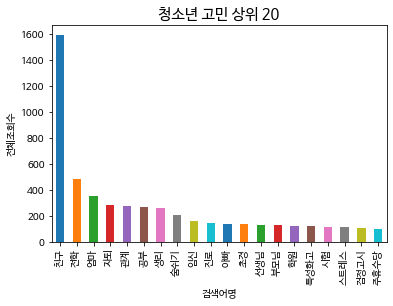

In [ ]:
plt.title('청소년 고민 상위 20', fontsize = 15)
plt.ylabel('전체조회수')
colors = ['C0','C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
df_ranking.plot.bar(color = colors)